In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np



In [2]:
df=pd.read_csv('/content/top_rated_9000_movies_on_TMDB.csv')

df.head()




id                     title original_language release_date  vote_average  \
0  278  The Shawshank Redemption                en   1994-09-23         8.706   
1  238             The Godfather                en   1972-03-14         8.690   
2  240     The Godfather Part II                en   1974-12-20         8.575   
3  424          Schindler's List                en   1993-12-15         8.565   
4  389              12 Angry Men                en   1957-04-10         8.546   

   vote_count  popularity                                           overview  \
0       26840     150.307  Imprisoned in the 1940s for the double murder ...   
1       20373     122.973  Spanning the years 1945 to 1955, a chronicle o...   
2       12291      94.204  In the continuing saga of the Corleone crime f...   
3       15695      74.615  The true story of how businessman Oskar Schind...   
4        8522      54.678  The defense and the prosecution have rested an...   

         genre_ids                       Genres  
0         [18, 80]           ['Drama', 'Crime']  
1         [18, 80]           ['Drama', 'Crime']  
2         [18, 80]           ['Drama', 'Crime']  
3  [18, 36, 10752]  ['Drama', 'History', 'War']  
4             [18]                    ['Drama']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9630 entries, 0 to 9629
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9630 non-null   int64  
 1   title              9630 non-null   object 
 2   original_language  9630 non-null   object 
 3   release_date       9630 non-null   object 
 4   vote_average       9630 non-null   float64
 5   vote_count         9630 non-null   int64  
 6   popularity         9630 non-null   float64
 7   overview           9630 non-null   object 
 8   genre_ids          9630 non-null   object 
 9   Genres             9630 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 752.5+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9630 entries, 0 to 9629
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9630 non-null   int64  
 1   title              9630 non-null   object 
 2   original_language  9630 non-null   object 
 3   release_date       9630 non-null   object 
 4   vote_average       9630 non-null   float64
 5   vote_count         9630 non-null   int64  
 6   popularity         9630 non-null   float64
 7   overview           9630 non-null   object 
 8   genre_ids          9630 non-null   object 
 9   Genres             9630 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 752.5+ KB


In [6]:
df.describe()

id  vote_average    vote_count   popularity
count  9.630000e+03   9630.000000   9630.000000  9630.000000
mean   1.944046e+05      6.633820   1976.992004    25.522728
std    2.576246e+05      0.783581   3124.089193    58.278888
min    2.000000e+00      2.200000    300.000000     0.018000
25%    1.013825e+04      6.106000    468.000000    10.780250
50%    3.748350e+04      6.659000    843.000000    15.620000
75%    3.524915e+05      7.200000   1964.750000    25.325000
max    1.226578e+06      8.706000  36306.000000  2811.772000

In [7]:
df.isnull().sum()

id                   0
title                0
original_language    0
release_date         0
vote_average         0
vote_count           0
popularity           0
overview             0
genre_ids            0
Genres               0
dtype: int64

In [8]:
# top 3 movies
top_movies = df.nlargest(3, 'vote_average')
print(top_movies[['title', 'vote_average', 'vote_count']])


                      title  vote_average  vote_count
0  The Shawshank Redemption         8.706       26840
1             The Godfather         8.690       20373
2     The Godfather Part II         8.575       12291


<ipython-input-9-cc98b8d7ae82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_popular_movies['popularity'], y=top_popular_movies['title'], palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWa

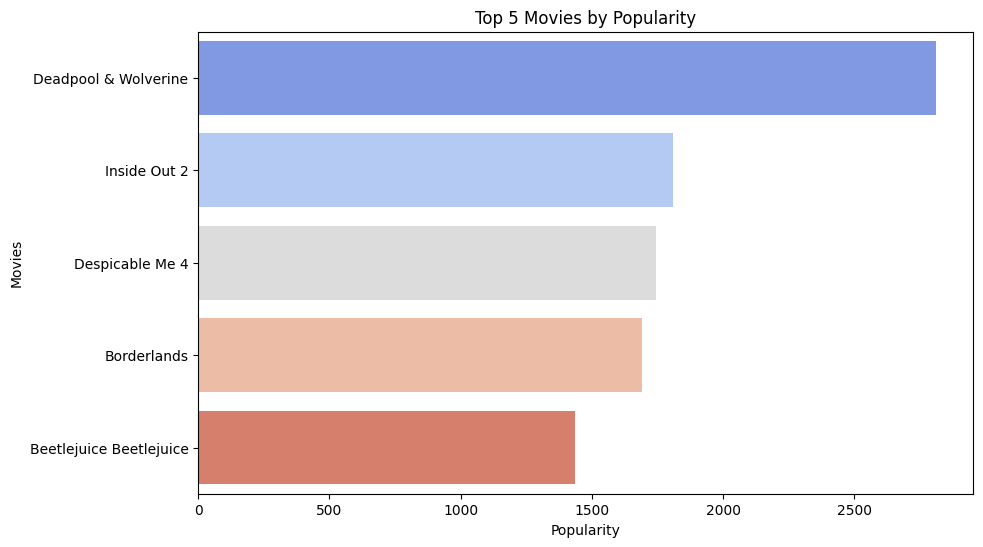

In [9]:
top_popular_movies = df.nlargest(5, 'popularity')

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_popular_movies['popularity'], y=top_popular_movies['title'], palette='coolwarm')
plt.title('Top 5 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Movies')
plt.show()

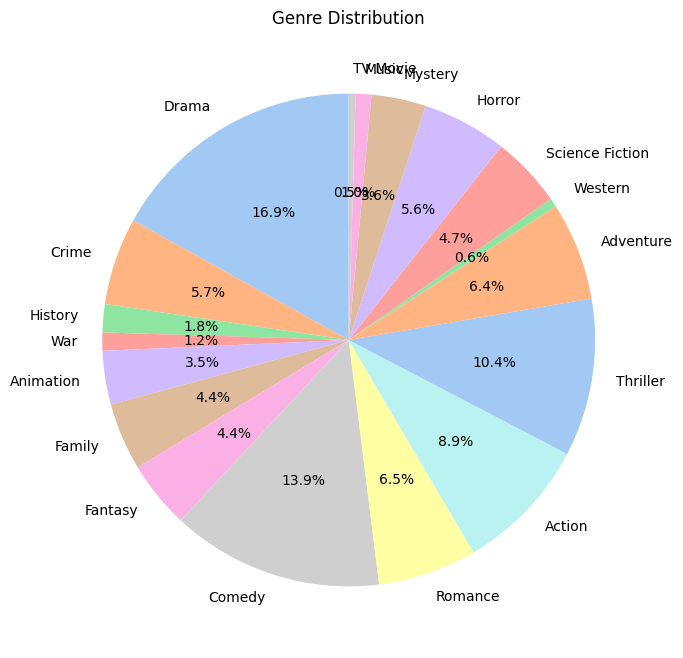

In [10]:
from collections import Counter
import ast

# Convert the string representation of lists to actual lists
df['Genres'] = df['Genres'].apply(ast.literal_eval)

# Flatten the list of genres and count the occurrences
all_genres = [genre for sublist in df['Genres'] for genre in sublist]
genre_counts = Counter(all_genres)

# Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Genre Distribution')
plt.show()